In [1]:
import sys
import os

# Ajouter le chemin du répertoire `scripts` au chemin Python
sys.path.append(os.path.join(os.getcwd(), '..', 'scripts'))


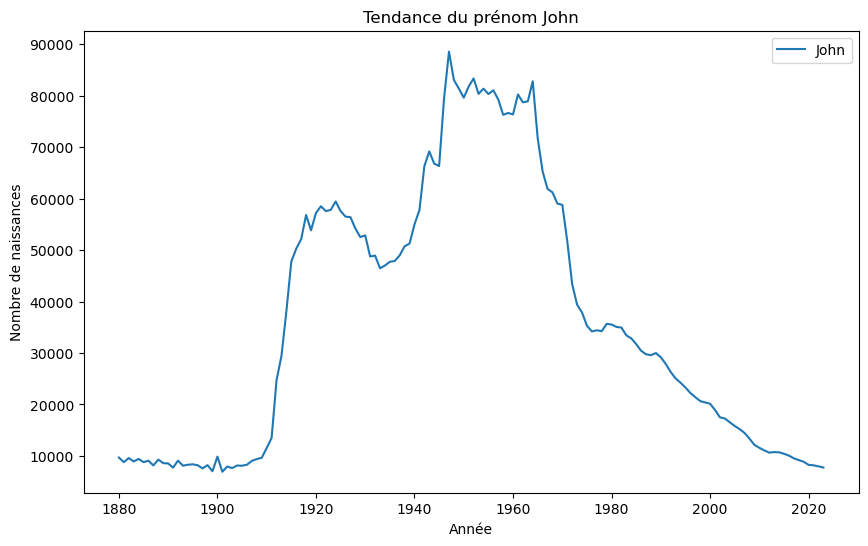

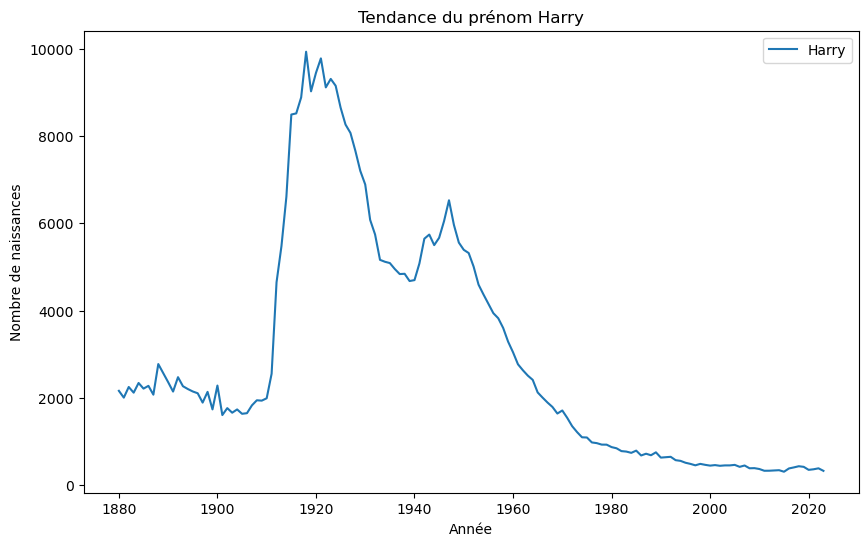

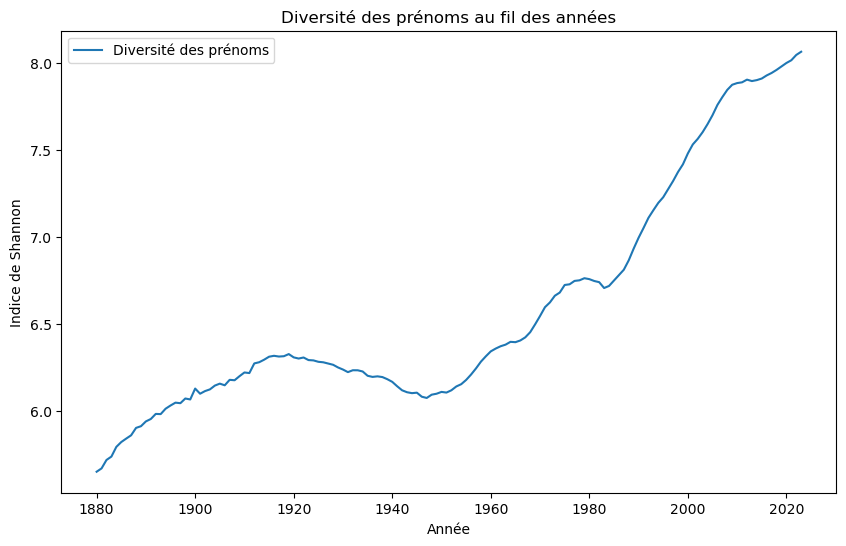

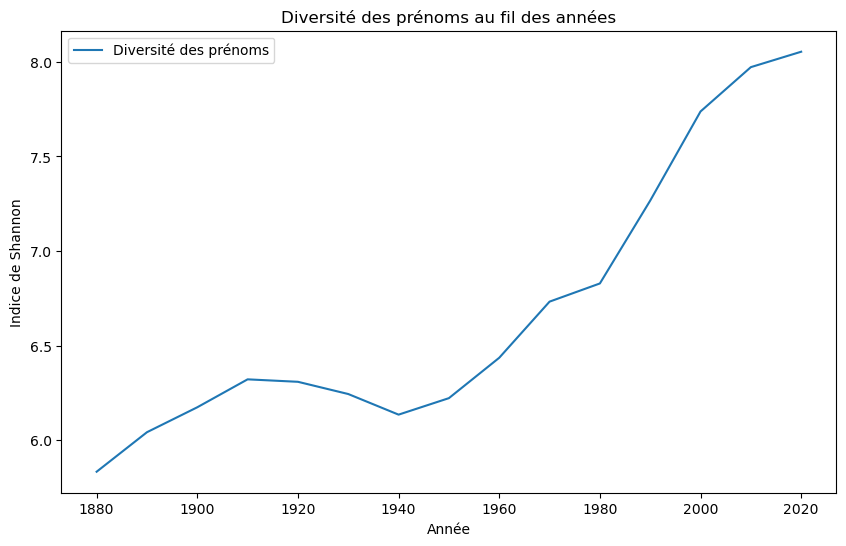

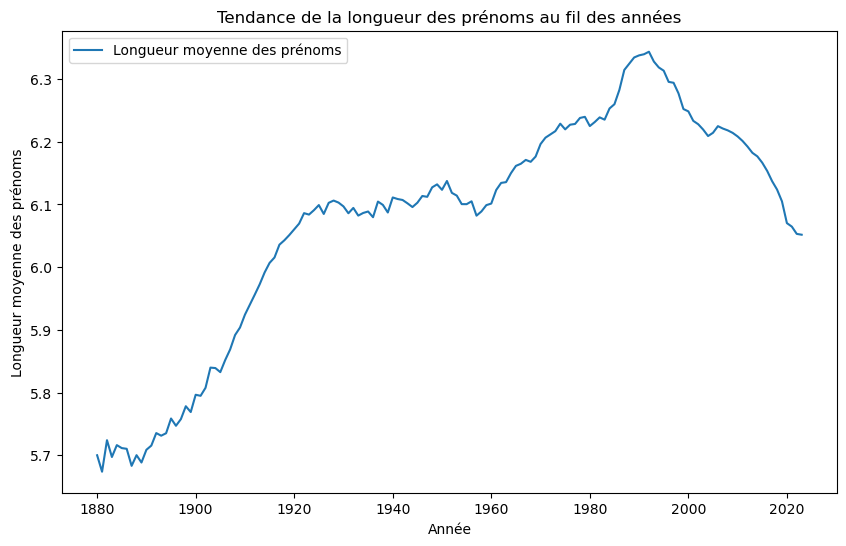

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from load_data import load_data
from scipy.stats import entropy

def create_pivot_table(data):
    # Crée un tableau pivot pour les prénoms par année
    pivot_table = data.pivot_table(values='Count', index='Year', columns='Name', aggfunc='sum', fill_value=0)
    return pivot_table

def study_trends(pivot_table, names):
    # Analyse et visualisation des tendances de prénoms spécifiques
    for name in names:
        plt.figure(figsize=(10, 6))
        plt.plot(pivot_table.index, pivot_table[name], label=name)
        plt.title(f'Tendance du prénom {name}')
        plt.xlabel('Année')
        plt.ylabel('Nombre de naissances')
        plt.legend()
        plt.show()

def measure_diversity(pivot_table):
    # Calcul et visualisation de l'indice de diversité de Shannon pour chaque année
    diversity = pivot_table.apply(entropy, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(diversity.index, diversity, label='Diversité des prénoms')
    plt.title('Diversité des prénoms au fil des années')
    plt.xlabel('Année')
    plt.ylabel('Indice de Shannon')
    plt.legend()
    plt.show()

def analyze_by_decade(data):
    # Ajoute une colonne 'Decade' au DataFrame et crée un tableau pivot par décennie
    data['Decade'] = (data['Year'] // 10) * 10
    pivot_decade = data.pivot_table(values='Count', index='Decade', columns='Name', aggfunc='sum', fill_value=0)
    return pivot_decade

def analyze_name_length(data):
    # Ajoute une colonne 'NameLength' au DataFrame et analyse la tendance de la longueur des prénoms
    data['NameLength'] = data['Name'].apply(len)
    length_trend = data.groupby('Year')['NameLength'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(length_trend.index, length_trend, label='Longueur moyenne des prénoms')
    plt.title('Tendance de la longueur des prénoms au fil des années')
    plt.xlabel('Année')
    plt.ylabel('Longueur moyenne des prénoms')
    plt.legend()
    plt.show()

# Exécutez les analyses spécifiques dans le notebook
data = load_data()
pivot_table = create_pivot_table(data)
study_trends(pivot_table, ['John', 'Harry'])
measure_diversity(pivot_table)
pivot_decade = analyze_by_decade(data)
measure_diversity(pivot_decade)
analyze_name_length(data)
